# Data Explorartion

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
print("Train data shape: " , train.shape)
print("Test data shape: " ,test.shape)

Train data shape:  (1460, 81)
Test data shape:  (1459, 80)


In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Plot the data - as part of exploration

In [6]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10,6)

In [14]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [23]:
np.log(200000000)

19.113827924512311

In [24]:
np.exp(19.113827924512311)

200000000.0

In [25]:
#Skew is :
train.SalePrice.skew()

1.8828757597682129

In [26]:
plt.hist(train.SalePrice,color='green')

(array([ 148.,  723.,  373.,  135.,   51.,   19.,    4.,    3.,    2.,    2.]),
 array([  34900.,  106910.,  178920.,  250930.,  322940.,  394950.,
         466960.,  538970.,  610980.,  682990.,  755000.]),
 <a list of 10 Patch objects>)

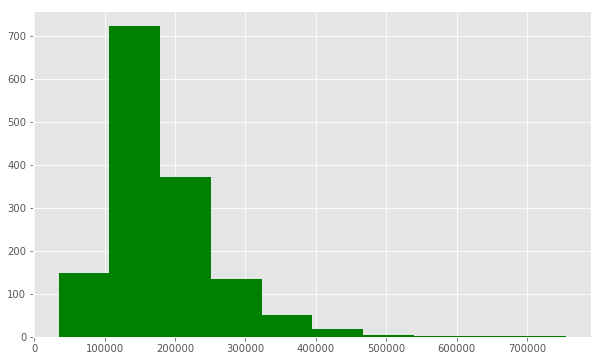

In [27]:
plt.show()

In [28]:
#Try log function to reduce skewness
#lets convert the saleprice to their log value

target = np.log(train.SalePrice)

In [29]:
target.describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

In [30]:
#New skew is :
target.skew() 
# A value closer to 0 considered to be good

0.12133506220520406

In [32]:
plt.hist(target,color='green')

(array([   5.,   12.,   54.,  184.,  470.,  400.,  220.,   90.,   19.,    6.]),
 array([ 10.46024211,  10.7676652 ,  11.07508829,  11.38251138,
         11.68993448,  11.99735757,  12.30478066,  12.61220375,
         12.91962684,  13.22704994,  13.53447303]),
 <a list of 10 Patch objects>)

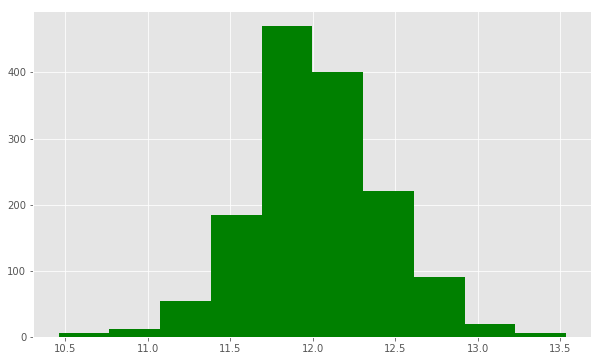

In [33]:
plt.show()

### Feature Engineering

In [ ]:
#First, we’ll check out the numerical features and make some plots. 
#The .select_dtypes() method 
#will return a subset of columns matching the specified data types.

In [38]:
numeric_features = train.select_dtypes(include=[np.number])

In [39]:
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [43]:
#if you are curious for non-integer variables
train.select_dtypes(include=[np.object]).dtypes

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [44]:
#The DataFrame.corr() method displays the correlation (or relationship) between the columns. We’ll examine the correlations between 
#the features and the target.
corr = numeric_features.corr()

In [45]:
type(corr)

pandas.core.frame.DataFrame

In [46]:
corr.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,...,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,0.022829,0.013228,0.165250,0.120411,0.260795,-0.025846,0.171217,0.177344,0.169392,0.132625,...,0.127875,0.140120,-0.027989,0.035447,0.056039,0.075679,0.024339,0.039160,0.013155,0.293053
std,0.164327,0.206872,0.217781,0.187661,0.283448,0.200596,0.299184,0.246353,0.214785,0.251963,...,0.184927,0.185041,0.196558,0.163405,0.167260,0.164106,0.164466,0.164511,0.168315,0.291845
min,-0.050298,-0.386347,-0.386347,-0.139781,-0.183882,-0.375983,-0.387268,-0.193919,-0.128101,-0.495251,...,-0.125989,-0.093079,-0.387268,-0.046635,-0.082864,-0.059689,-0.043080,-0.145721,-0.145721,-0.135907
25%,-0.018682,-0.055879,0.039197,0.007031,0.030935,-0.090699,-0.013391,0.007819,0.013491,-0.013051,...,0.002752,0.006882,-0.108229,-0.007664,-0.005747,0.009143,-0.020468,-0.006362,-0.028922,0.002612
50%,0.000392,-0.009860,0.112149,0.081223,0.245656,-0.039410,0.135533,0.123960,0.142710,0.089590,...,0.100123,0.118732,-0.026855,0.019609,0.042272,0.055623,-0.005018,0.021331,-0.013940,0.299982
75%,0.009940,0.038442,0.265772,0.178226,0.522412,0.025501,0.307277,0.275636,0.279719,0.238158,...,0.219864,0.223116,0.010304,0.034154,0.064170,0.080533,0.007060,0.036471,0.009883,0.518948
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
#corr.head

In [53]:
#most corelated 5 variables
print(corr['SalePrice'].sort_values(ascending=False)[:5])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64


In [ ]:
#Least corelated 5 variables

In [55]:
print(corr['SalePrice'].sort_values(ascending=False)[-5:])

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [56]:
#Let’s dig deeper on OverallQual
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [59]:
#If you want to see frequency distributions - Condition 5 is most common
train.OverallQual.value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [60]:
# Create a Pivot table to see SalePrice and OverallQual relationship

quality_pivot = train.pivot_table(index='OverallQual',values='SalePrice',
                                 aggfunc=np.median)

In [61]:
quality_pivot

OverallQual
1      50150
2      60000
3      86250
4     108000
5     133000
6     160000
7     200141
8     269750
9     345000
10    432390
Name: SalePrice, dtype: int64

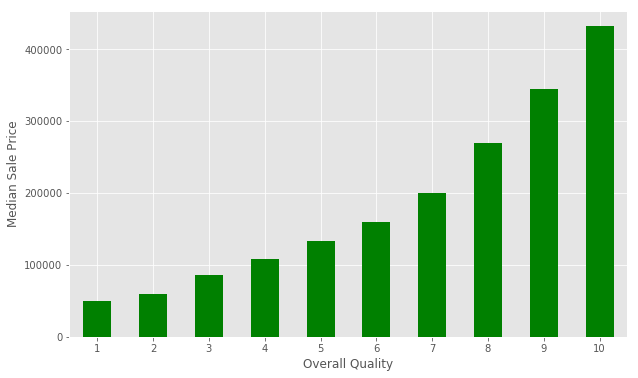

In [71]:
# We can see the above result in a bar chart
quality_pivot.plot(kind='bar', color='green')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

#Notice that the median sales price strictly increases as Overall Quality increases.

In [ ]:
#scatter plot to visualize relationship betwwn GrLiveArea and Saleprice

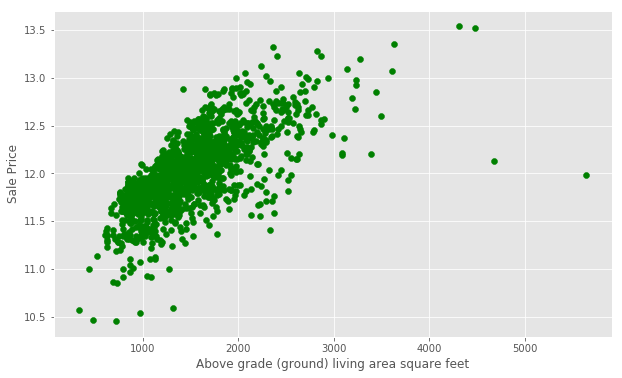

In [73]:
plt.scatter(x=train['GrLivArea'],y=target,color='green')
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

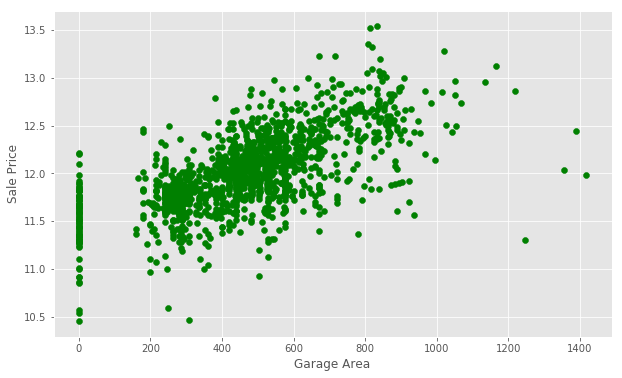

In [74]:
#lets see for GarageArea
plt.scatter(x=train['GarageArea'], y=target,color='green')
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

Notice that there are many homes with 0 for Garage Area, indicating that they don’t have a garage. We’ll transform other features later to reflect this assumption. There are a few outliers as well. Outliers can affect a regression model by pulling our estimated regression line further away from the true population regression line. So, we’ll remove those observations from our data. Removing outliers is an art and a science. There are many techniques for dealing with outliers.

In [75]:
train = train[train['GarageArea'] < 1200]

In [76]:
train.shape

(1455, 81)

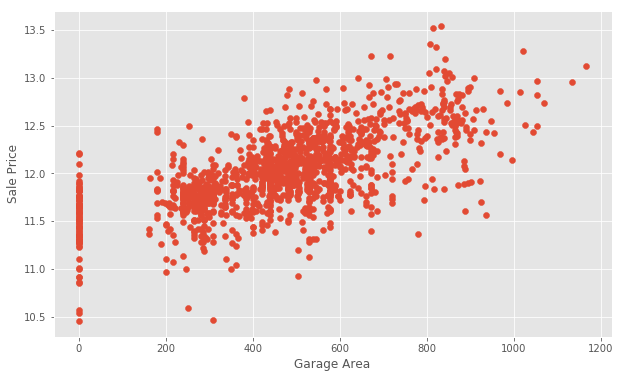

In [78]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
#plt.xlim(-200,1600) # This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [82]:
train.isnull().sum().sort_values(ascending=False)[:25]

PoolQC          1449
MiscFeature     1402
Alley           1364
Fence           1174
FireplaceQu      689
LotFrontage      258
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
YearRemodAdd       0
MSSubClass         0
Foundation         0
ExterCond          0
ExterQual          0
dtype: int64

In [83]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])

In [84]:
nulls.columns

RangeIndex(start=0, stop=1, step=1)

In [85]:
nulls.shape

(25, 1)

In [86]:
nulls.head

<bound method NDFrame.head of                  0
PoolQC        1449
MiscFeature   1402
Alley         1364
Fence         1174
FireplaceQu    689
LotFrontage    258
GarageCond      81
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
BsmtExposure    38
BsmtFinType2    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrArea       8
MasVnrType       8
Electrical       1
Utilities        0
YearRemodAdd     0
MSSubClass       0
Foundation       0
ExterCond        0
ExterQual        0>

In [89]:
nulls.columns=['Null count']
nulls.index.name = 'Feature'
nulls

,Null count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


In [90]:
print ("Unique values are:", train.MiscFeature.unique())

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


### Wrangling non-numeric features

In [93]:
categoricals = train.select_dtypes(exclude=[np.number])
#categoricals = train.select_dtypes(include=[np.object])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196
